<a href="https://colab.research.google.com/github/Kirti1807/Notebooks/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required packages

In [ ]:
import numpy as np
import pandas as pd

Converting the DateFile to pandas Dataframe

In [ ]:
_df = pd.read_excel('/content/Omnify-Analyst-Intership-Task.xlsx', sheet_name="Google Ads Data")

In [ ]:
_df.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA


In [ ]:
_df.describe()

,Clicks,Impressions,Cost ($),Leads,Prospects
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.925837,16.662679,6.671483,0.028708,0.050239
std,1.900840,46.743636,14.253019,0.167185,0.285312
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,12.000000,6.800000,0.000000,0.000000
max,12.000000,357.000000,92.090000,1.000000,3.000000


In [ ]:
_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Week            418 non-null    datetime64[ns]
 1   Campaign        418 non-null    object        
 2   Ad group        418 non-null    object        
 3   Keyword type    418 non-null    object        
 4   Search Keyword  412 non-null    object        
 5   Currency        418 non-null    object        
 6   Clicks          418 non-null    int64         
 7   Impressions     418 non-null    int64         
 8   Cost ($)        418 non-null    float64       
 9   Leads           418 non-null    int64         
 10  Prospects       418 non-null    int64         
 11  Payment ($)     8 non-null      object        
 12  Payment Date    8 non-null      datetime64[ns]
 13  Country         418 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memo

In [ ]:
data_df = _df

Finding the CPC(Cost Per Click) by Performing the Following Operations

CPC = (Total Cost)/(Number of Clicks)

In [ ]:
data_df['CPC'] = (data_df["Cost ($)"])/(data_df.Clicks)

In [ ]:
data_df.head(1)

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country,CPC
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA,19.165


Removing the Unneccesary signs in 'Payment ($)' column

In [ ]:
data_df["Payment"] = data_df["Payment ($)"].replace({'\$':'','\,':''}, regex = True)

In [ ]:
data_df.head(1)

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country,CPC,Payment
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA,19.165,980


Removing the 'Payment ($)' column

In [ ]:
data_df.drop('Payment ($)', inplace=True, axis=1)

Converting the Nan values into zero in 'Payment' column

In [ ]:
data_df['Payment'].fillna(0, inplace=True)

Converting the 'Payment' column to numeric column  to perform some arthemetic operations

In [ ]:
data_df['Payment'] = pd.to_numeric(data_df['Payment'],errors='coerce').astype(float)

Creating the column 'Profit', which is computed by the difference of 'CPC' and 'Payment'

In [ ]:
data_df['Profit'] = (data_df["Payment"]) - (data_df["CPC"])

Some values in the 'Profit' column are zero and negative beacause there is some missing values in the data which we considered as zero in this analysis.

In [ ]:
data_df['Profit']

0       960.8350
1       -11.7000
2      1176.7175
3       -11.9550
4        -2.4450
         ...    
413          NaN
414          NaN
415          NaN
416          NaN
417          NaN
Name: Profit, Length: 418, dtype: float64

# Create a combined report with all key metrics (esp: Spends and Returns) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.

## Total Spends by week

In [ ]:
data_df.columns

Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment Date', 'Country', 'CPC', 'Payment', 'Profit'],
      dtype='object')

In [ ]:
data_df['Week'] = pd.to_datetime(data_df.Week)

In [ ]:
df1 = pd.DataFrame(data_df.groupby('Week')['CPC'].sum())
df1

,CPC
Week,
2021-01-25,87.377500
2021-02-01,118.255000
2021-02-08,122.665833
2021-02-15,66.574417
2021-02-22,87.920833
2021-03-01,71.077000
2021-03-08,101.375595
2021-03-15,79.623750
2021-03-22,101.875909


## Total Spends by Month

In [ ]:
data_df['month'] = pd.DatetimeIndex(data_df.Week).month

In [ ]:
df2 = pd.DataFrame(data_df.groupby('month')['CPC'].sum())
df2

,CPC
month,
1,87.377500
2,395.416083
3,421.926838
4,206.663098
5,79.268000


## Total Returns by week

In [ ]:
df3 = pd.DataFrame(data_df.groupby('Week')['Payment'].sum())
df3

,Payment
Week,
2021-01-25,2168.0
2021-02-01,0.0
2021-02-08,980.0
2021-02-15,1788.0
2021-02-22,0.0
2021-03-01,980.0
2021-03-08,0.0
2021-03-15,0.0
2021-03-22,2388.0


## Total Returns by Month

In [ ]:
df4 = pd.DataFrame(data_df.groupby('month')['Payment'].sum())
df4

,Payment
month,
1,2168.0
2,2768.0
3,3368.0
4,2388.0
5,1188.0


# Which is the most profitable channel

In [ ]:
data_df.sort_values('Profit', ascending=False,)['Campaign'].head(1)

235    EK_Generic_Swimming
Name: Campaign, dtype: object

# Which category/keyword is the most profitable

In [ ]:
data_df_1 = data_df.groupby('Search Keyword')[['Profit']].sum()

In [ ]:
data_df_1.sort_values('Profit',ascending = False).head(1)

,Profit
Search Keyword,
reservation management system,4011.525


# Look for insights by analysing data points on time series graphs

In [ ]:
from matplotlib import pyplot as plt

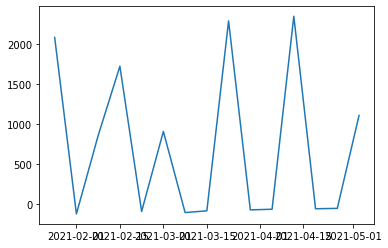

In [ ]:
groups = data_df.groupby('Week')['Profit'].sum()
plt.plot(groups)

As we can see that the graph above is fluctuating,this may be the cause of the missing data in the given dataset. It is possible to analyse even further if there is no missing values. 

# Analyse the Impact of geography

In [ ]:
data_df['Country'].unique()

array(['USA'], dtype=object)

As there is only One Country data to analyse.There is nothing to analyse on the geography.